In [1]:
!pip install -q -U google-generativeai
!pip install python-dotenv


In [2]:
import os
import textwrap
import io
import requests
import google.generativeai as genai
import PIL.Image
from dotenv import load_dotenv
from IPython.display import display
from IPython.display import Markdown
import IPython.display as display
import requests
from PIL import Image
from io import BytesIO


C:\Users\AAKASH\.conda\envs\gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#This line for rendering content in text
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### load googlegemini apikey 

In [4]:
load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

### List of LLMs available by google

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Calorie tracking

#### Example 1

In [6]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  405k  100  405k    0     0  3216k      0 --:--:-- --:--:-- --:--:-- 3320k


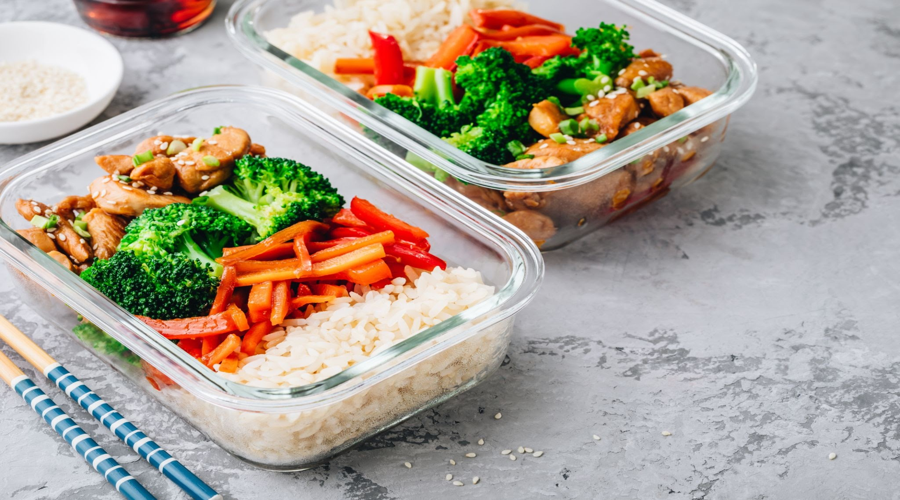

In [7]:
img1 = PIL.Image.open('image.jpg')
new_width = 900 
new_height = 500  
img_resized = img1.resize((new_width, new_height))
img_resized


In [8]:
model = genai.GenerativeModel('gemini-pro-vision')

In [12]:
response = model.generate_content(img1)
to_markdown(response.text)

>  Chicken Teriyaki Meal Prep Bowls with brown rice, roasted broccoli and bell peppers.

In [13]:
response = model.generate_content(["caluculate the calorie content of the image", img1], stream=True)
response.resolve()

In [14]:
to_markdown(response.text)

>  The calorie content of the image is about 450-500 calories.
> 
> The image contains a bowl of rice, chicken, broccoli, and carrots. Rice is a high-calorie food, and chicken is a moderate-calorie food. Broccoli and carrots are low-calorie foods. The calorie content of the image is about 450-500 calories.

### Fetching images avalaible on internet to track calorie content of it

#### Example 2

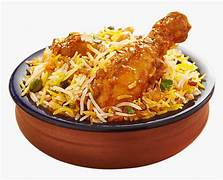

In [16]:
url ="https://tse2.mm.bing.net/th?id=OIP.zpkZ2MWW-NDWjBSsW7NpPQHaF9&pid=Api&P=0&h=180"
response = requests.get(url)
img2 = Image.open(BytesIO(response.content))
display.display(img2)

In [17]:
model1 = genai.GenerativeModel('gemini-pro-vision')
response = model1.generate_content(img2)
to_markdown(response.text)

>  Chicken Biryani

In [18]:
response = model1.generate_content(["caluculate the calorie content of the image", img2], stream=True)
response.resolve()
to_markdown(response.text)

>  The calorie content of the image is 640 calories.

#### Example 3

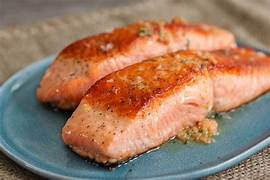

In [19]:
url =  "https://tse2.mm.bing.net/th?id=OIP.8jigYVeB_5jd0pF4QpY8QwHaE7&pid=Api&P=0&h=180"
response = requests.get(url)
img3 = Image.open(BytesIO(response.content))
display.display(img3)

In [20]:
model2 = genai.GenerativeModel('gemini-pro-vision')

In [26]:
response = model2.generate_content(img3)
to_markdown(response.text)

>  Honey Garlic Salmon

In [27]:
response = model2.generate_content(["caluculate the calorie content of the image", img3], stream=True)
response.resolve()

In [28]:
to_markdown(response.text)

>  The calorie content of the image is 475 calories.

# Conclusion

#### By leveraging Google Gemini LLM, calorie tracking through image recognition achieves remarkable efficiency, eliminating the necessity for intricate model construction. The outcomes are not only precise but also remarkably impressive, heralding a notable breakthrough in effortless dietary monitoring. Furthermore, the ability to predict original content by assessing full quantity further enhances its utility and accuracy.